# Python-in-the-lab: introduction to the classes III

In [1]:
import os
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
mainDir = "/home/gf/src/Python/Python-in-the-lab/Bk"
filename = "F64ac_0.01_S.dat"
filename = os.path.join(mainDir, filename)

In [3]:
class Dist:
    """
    This class load the data given a filename
    """
    def __init__(self, filename, is_avoid_zeros=True):
        # It is better to make general x,y arrays
        self.x, self.y = np.loadtxt(filename, comments="#", unpack=True)
        if is_avoid_zeros:
            s_len = len(self.x)
            self.x, self.y = self.avoid_zeros()
            print("%i lines deleted" % (s_len - len(self.x)))
    
    def avoid_zeros(self):
        is_not_zero = self.y != 0
        x = self.x[is_not_zero]
        y = self.y[is_not_zero]
        return x, y

    def plot(self, loglog=True):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        if loglog:
            ax.loglog(self.x, self.y, 'o')
        else:
            ax.plot(self.x, self.y, 'o')

# Subclasses

In [4]:
class Sizes(Dist):
    def plot(self):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.loglog(self.x, self.y, '*')

#### This class automatically import the method of the mother class Dist!

In [5]:
s0 = Sizes(filename)

14 lines deleted


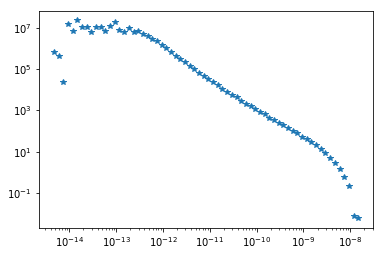

In [6]:
s0.plot()

#### We can even initialize them separately, with different inputs

In [7]:
class Sizes(Dist):
    def __init__(self, freq, mainDir, material="F64ac"):
        filename = "%s_%s_S.dat" % (material, freq)
        filename = os.path.join(mainDir, filename)
        print(filename)
        #Dist.__init__(self, filename)
        super().__init__(filename) # Works as the line above
        
    def plot(self):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.loglog(self.x, self.y, '*')

In [8]:
s002 = Sizes("0.02", mainDir)

/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.02_S.dat
12 lines deleted


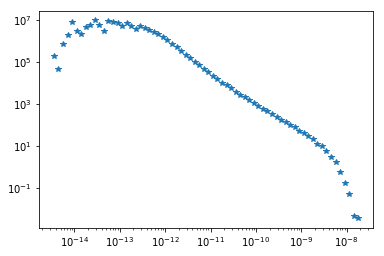

In [9]:
s002.plot()

In [10]:
if not os.path.exists(mainDir):
    print("Problems!")